In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import yaml
from utils_visual import *

In [2]:
# define global variables for file managment
file_path = 'exps.xlsx'
sheet_name = 'cw-graph-clusters'

In [3]:
old_best_model = 0.211
params = .5, .4, .1

In [4]:
sum(params)

1.0

## Intoducing Pruned GSBW (PGSBW) and conceptualized GSBW (CGSBW)

### Performance based on the size of spectral clustering

In [5]:
data = pd.read_excel('exps.xlsx', sheet_name=sheet_name)
data

,PGSBW-30,CGSBW-30,PGSBW-50,CGSBW-50,PGSBW-70,CGSBW-70,PGSBW-90,CGSBW-90,PGSBW-110,CGSBW-110,PGSBW-130,CGSBW-130,PGSBW-150,CGSBW-150,PGSBW-170,CGSBW-170,avg_pre,%prune
0,0.373,0.268,0.373,0.268,0.373,0.268,0.373,0.268,0.373,0.268,0.370,0.268,0.355,0.268,0.359,0.268,0.22501,0.234852
1,0.107,0.030,0.107,0.030,0.107,0.030,0.107,0.030,0.107,0.030,0.179,0.030,0.181,0.030,0.177,0.030,0.21848,0.239606
2,0.169,0.143,0.169,0.143,0.169,0.143,0.169,0.143,0.169,0.144,0.170,0.143,0.174,0.144,0.174,0.144,0.22501,0.457344
3,0.102,0.115,0.102,0.113,0.102,0.115,0.102,0.114,0.102,0.115,0.116,0.115,0.110,0.113,0.101,0.115,0.21846,0.455442
4,0.300,0.292,0.300,0.289,0.300,0.288,0.300,0.289,0.300,0.292,0.300,0.289,0.300,0.288,0.300,0.288,0.22502,0.616131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.304,0.219,0.304,0.219,0.304,0.220,0.304,0.220,0.304,0.220,0.313,0.220,0.299,0.220,0.304,0.220,NaN,NaN
96,0.267,0.381,0.267,0.381,0.267,0.381,0.267,0.381,0.267,0.381,0.279,0.381,0.353,0.381,0.283,0.381,NaN,NaN
97,0.145,0.101,0.145,0.101,0.145,0.102,0.145,0.101,0.145,0.101,0.131,0.101,0.137,0.102,0.138,0.101,NaN,NaN
98,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [6]:
clusters_experiment = data.iloc[:, :-2]
clusters_experiment

,PGSBW-30,CGSBW-30,PGSBW-50,CGSBW-50,PGSBW-70,CGSBW-70,PGSBW-90,CGSBW-90,PGSBW-110,CGSBW-110,PGSBW-130,CGSBW-130,PGSBW-150,CGSBW-150,PGSBW-170,CGSBW-170
0,0.373,0.268,0.373,0.268,0.373,0.268,0.373,0.268,0.373,0.268,0.370,0.268,0.355,0.268,0.359,0.268
1,0.107,0.030,0.107,0.030,0.107,0.030,0.107,0.030,0.107,0.030,0.179,0.030,0.181,0.030,0.177,0.030
2,0.169,0.143,0.169,0.143,0.169,0.143,0.169,0.143,0.169,0.144,0.170,0.143,0.174,0.144,0.174,0.144
3,0.102,0.115,0.102,0.113,0.102,0.115,0.102,0.114,0.102,0.115,0.116,0.115,0.110,0.113,0.101,0.115
4,0.300,0.292,0.300,0.289,0.300,0.288,0.300,0.289,0.300,0.292,0.300,0.289,0.300,0.288,0.300,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.304,0.219,0.304,0.219,0.304,0.220,0.304,0.220,0.304,0.220,0.313,0.220,0.299,0.220,0.304,0.220
96,0.267,0.381,0.267,0.381,0.267,0.381,0.267,0.381,0.267,0.381,0.279,0.381,0.353,0.381,0.283,0.381
97,0.145,0.101,0.145,0.101,0.145,0.102,0.145,0.101,0.145,0.101,0.131,0.101,0.137,0.102,0.138,0.101
98,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422


In [7]:
cls_avg = data["avg_pre"].dropna().values
cls_avg

array([0.22501, 0.21848, 0.22501, 0.21846, 0.22502, 0.21859, 0.22504,
       0.21864, 0.225  , 0.21898, 0.2332 , 0.21903, 0.22575, 0.21895,
       0.23698, 0.21877])

In [8]:
cls_prune_per = data["%prune"].dropna().values
cls_prune_per

array([ 0.23485227,  0.23960636,  0.45734389,  0.45544225,  0.61613064,
        1.98435903,  0.8305403 ,  0.86619601,  1.73809694,  1.95630987,
       30.51463073,  2.15312938, 22.59288312,  2.23870308, 34.76954527,
        2.46737503])

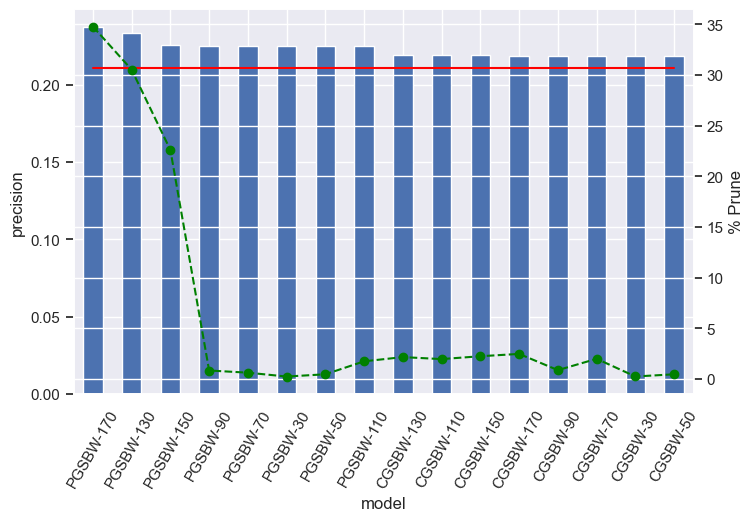

In [9]:
plot_experiment(clusters_experiment, cls_avg, cls_prune_per, old_best_model)

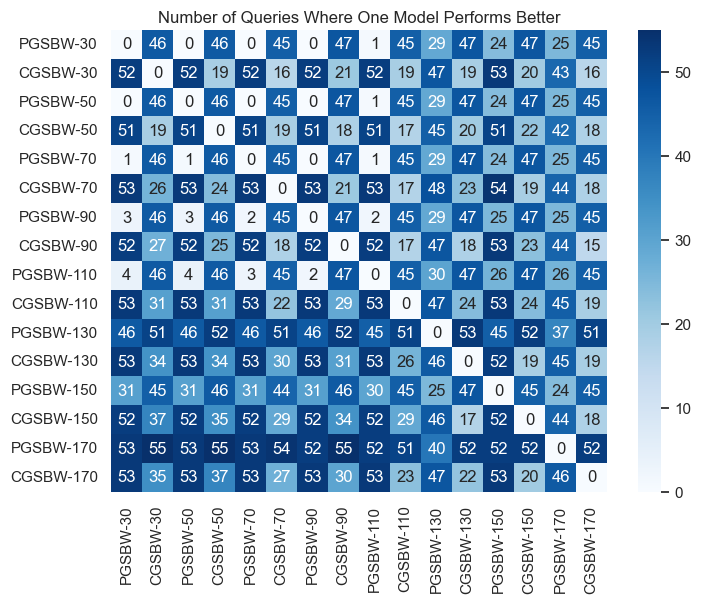

In [10]:
# cm = compare_models(clusters_experiment.iloc[:, 0::2]) # compare only pgsbw's
cm = compare_models(clusters_experiment)
plot_heatmap(cm) 

In [11]:
# evaluated_models = evaluate_models(cm, cls_avg[0::2], cls_prune_per[0::2], *params)
evaluated_models = evaluate_models(cm, cls_avg, cls_prune_per, *params)
print(evaluated_models)

{'PGSBW-30': 0.2392, 'CGSBW-30': 0.2653, 'PGSBW-50': 0.2395, 'CGSBW-50': 0.2632, 'PGSBW-70': 0.2403, 'CGSBW-70': 0.2758, 'PGSBW-90': 0.2432, 'CGSBW-90': 0.2707, 'PGSBW-110': 0.2461, 'CGSBW-110': 0.2862, 'PGSBW-130': 0.3651, 'CGSBW-130': 0.2901, 'PGSBW-150': 0.3016, 'CGSBW-150': 0.2902, 'PGSBW-170': 0.3899, 'CGSBW-170': 0.2916}


### Performance based on the size of spectral clustering and similarity between nodes

In [12]:
data = pd.read_excel('exps.xlsx', sheet_name=f"{sheet_name}-sim")
data

,PGSBW-30-0.1,CGSBW-30-0.1,PGSBW-30-0.3,CGSBW-30-0.3,PGSBW-30-0.5,CGSBW-30-0.5,PGSBW-30-0.7,CGSBW-30-0.7,PGSBW-50-0.1,CGSBW-50-0.1,...,PGSBW-170-0.1,CGSBW-170-0.1,PGSBW-170-0.3,CGSBW-170-0.3,PGSBW-170-0.5,CGSBW-170-0.5,PGSBW-170-0.7,CGSBW-170-0.7,avg_pre,%prune
0,0.363,0.268,0.357,0.268,0.353,0.268,0.344,0.268,0.359,0.268,...,0.373,0.268,0.319,0.268,0.343,0.268,0.313,0.268,0.23318,28.567014
1,0.110,0.030,0.087,0.030,0.114,0.030,0.096,0.030,0.112,0.030,...,0.105,0.030,0.113,0.030,0.071,0.030,0.076,0.030,0.21827,28.566539
2,0.175,0.143,0.175,0.143,0.174,0.143,0.173,0.143,0.175,0.143,...,0.173,0.144,0.178,0.144,0.184,0.144,0.147,0.144,0.23625,47.987412
3,0.112,0.113,0.105,0.113,0.105,0.113,0.137,0.113,0.116,0.113,...,0.108,0.115,0.119,0.115,0.114,0.115,0.112,0.115,0.21827,47.971248
4,0.300,0.287,0.300,0.287,0.317,0.287,0.299,0.287,0.300,0.289,...,0.300,0.288,0.298,0.288,0.283,0.288,0.306,0.288,0.23513,66.689961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.298,0.219,0.285,0.219,0.269,0.219,0.270,0.219,0.285,0.219,...,0.284,0.220,0.297,0.220,0.287,0.220,0.293,0.220,NaN,NaN
96,0.262,0.381,0.239,0.381,0.254,0.381,0.243,0.381,0.283,0.381,...,0.281,0.381,0.293,0.381,0.340,0.381,0.389,0.381,NaN,NaN
97,0.132,0.101,0.131,0.101,0.138,0.101,0.132,0.101,0.149,0.101,...,0.138,0.101,0.129,0.101,0.136,0.101,0.136,0.101,NaN,NaN
98,0.602,0.422,0.602,0.422,0.602,0.422,0.603,0.422,0.602,0.422,...,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,NaN,NaN


### Prepare data for ploting and analysis to gain insight

In [13]:
cls_sim_experiment = data.iloc[:, :-2]
cls_sim_experiment

,PGSBW-30-0.1,CGSBW-30-0.1,PGSBW-30-0.3,CGSBW-30-0.3,PGSBW-30-0.5,CGSBW-30-0.5,PGSBW-30-0.7,CGSBW-30-0.7,PGSBW-50-0.1,CGSBW-50-0.1,...,PGSBW-150-0.7,CGSBW-150-0.7,PGSBW-170-0.1,CGSBW-170-0.1,PGSBW-170-0.3,CGSBW-170-0.3,PGSBW-170-0.5,CGSBW-170-0.5,PGSBW-170-0.7,CGSBW-170-0.7
0,0.363,0.268,0.357,0.268,0.353,0.268,0.344,0.268,0.359,0.268,...,0.378,0.268,0.373,0.268,0.319,0.268,0.343,0.268,0.313,0.268
1,0.110,0.030,0.087,0.030,0.114,0.030,0.096,0.030,0.112,0.030,...,0.078,0.030,0.105,0.030,0.113,0.030,0.071,0.030,0.076,0.030
2,0.175,0.143,0.175,0.143,0.174,0.143,0.173,0.143,0.175,0.143,...,0.182,0.144,0.173,0.144,0.178,0.144,0.184,0.144,0.147,0.144
3,0.112,0.113,0.105,0.113,0.105,0.113,0.137,0.113,0.116,0.113,...,0.252,0.113,0.108,0.115,0.119,0.115,0.114,0.115,0.112,0.115
4,0.300,0.287,0.300,0.287,0.317,0.287,0.299,0.287,0.300,0.289,...,0.306,0.288,0.300,0.288,0.298,0.288,0.283,0.288,0.306,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.298,0.219,0.285,0.219,0.269,0.219,0.270,0.219,0.285,0.219,...,0.282,0.220,0.284,0.220,0.297,0.220,0.287,0.220,0.293,0.220
96,0.262,0.381,0.239,0.381,0.254,0.381,0.243,0.381,0.283,0.381,...,0.388,0.381,0.281,0.381,0.293,0.381,0.340,0.381,0.389,0.381
97,0.132,0.101,0.131,0.101,0.138,0.101,0.132,0.101,0.149,0.101,...,0.142,0.102,0.138,0.101,0.129,0.101,0.136,0.101,0.136,0.101
98,0.602,0.422,0.602,0.422,0.602,0.422,0.603,0.422,0.602,0.422,...,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422,0.602,0.422


In [14]:
# split dataframes for each similarity condition letting only cluster size to vary
selected_columns = [
    [
        column
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for column in cls_sim_experiment.columns[i:i+2].values  # Get the subset of columns
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_per_sim_list = [cls_sim_experiment[columns] for columns in selected_columns]
cls_per_sim_list[0].head()

,PGSBW-30-0.1,CGSBW-30-0.1,PGSBW-50-0.1,CGSBW-50-0.1,PGSBW-70-0.1,CGSBW-70-0.1,PGSBW-90-0.1,CGSBW-90-0.1,PGSBW-110-0.1,CGSBW-110-0.1,PGSBW-130-0.1,CGSBW-130-0.1,PGSBW-150-0.1,CGSBW-150-0.1,PGSBW-170-0.1,CGSBW-170-0.1
0,0.363,0.268,0.359,0.268,0.364,0.268,0.365,0.268,0.356,0.269,0.373,0.268,0.378,0.268,0.373,0.268
1,0.110,0.030,0.112,0.030,0.106,0.030,0.107,0.030,0.106,0.030,0.107,0.030,0.107,0.030,0.105,0.030
2,0.175,0.143,0.175,0.143,0.174,0.143,0.175,0.143,0.175,0.143,0.173,0.143,0.170,0.143,0.173,0.144
3,0.112,0.113,0.116,0.113,0.111,0.115,0.116,0.115,0.115,0.116,0.115,0.113,0.111,0.115,0.108,0.115
4,0.300,0.287,0.300,0.289,0.300,0.290,0.300,0.288,0.300,0.287,0.300,0.289,0.300,0.289,0.300,0.288


In [15]:
cls_sim_avg = data['avg_pre'].dropna().values
cls_sim_avg_list = [
    np.array([
        avg
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for avg in cls_sim_avg[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

In [16]:
cls_sim_prune_per = data['%prune'].dropna().values

cls_sim_prune_per_list = [
    np.array([
        prune_per
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for prune_per in cls_sim_prune_per[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

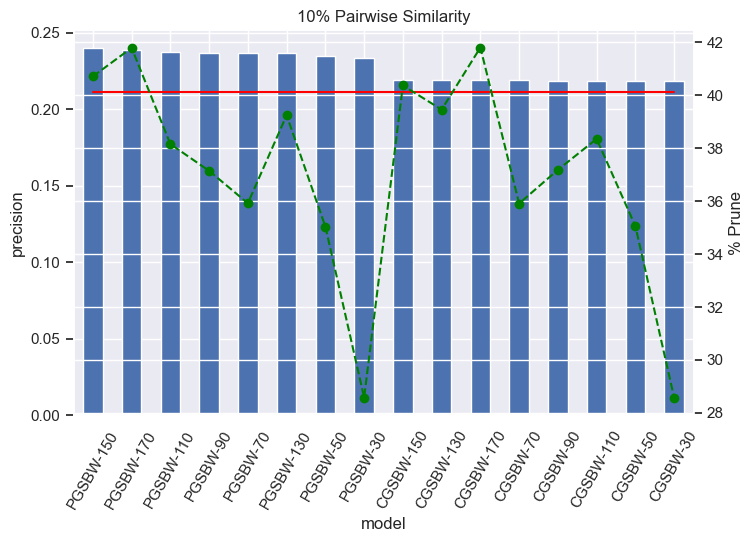

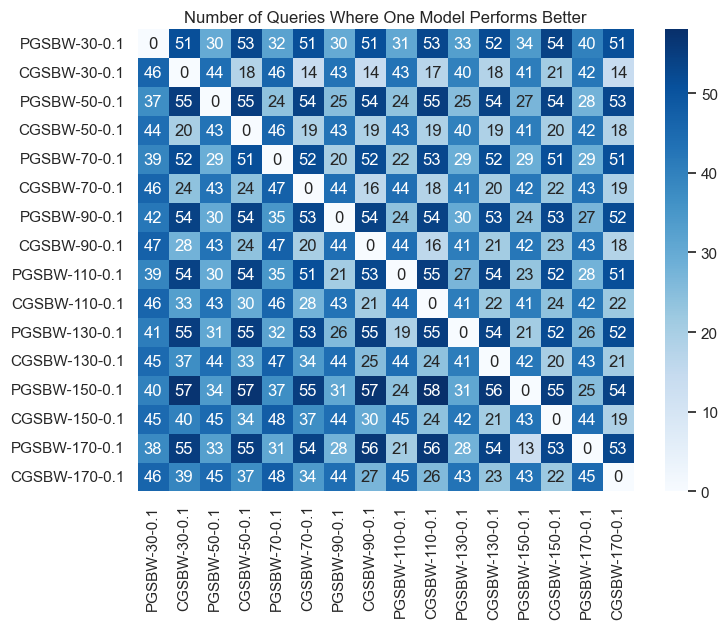

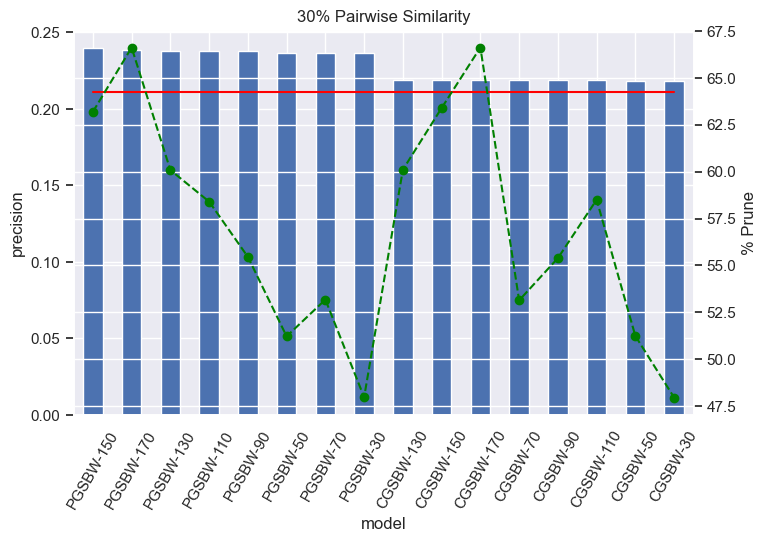

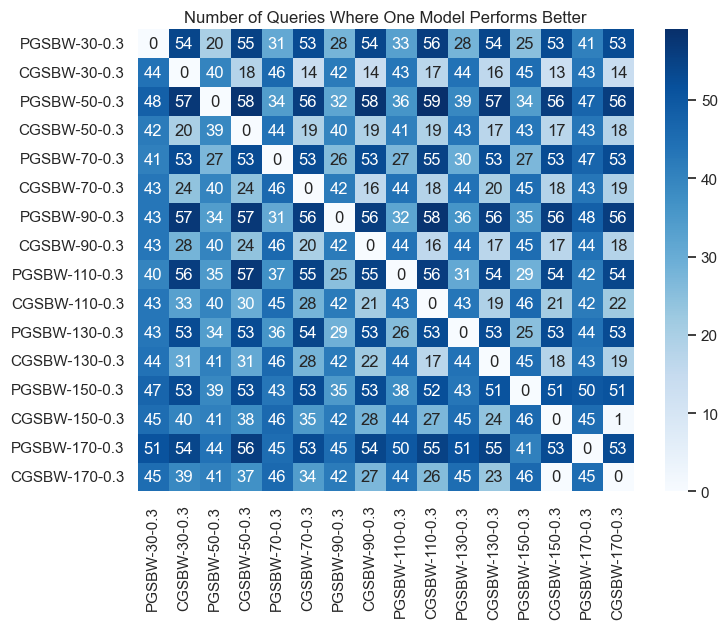

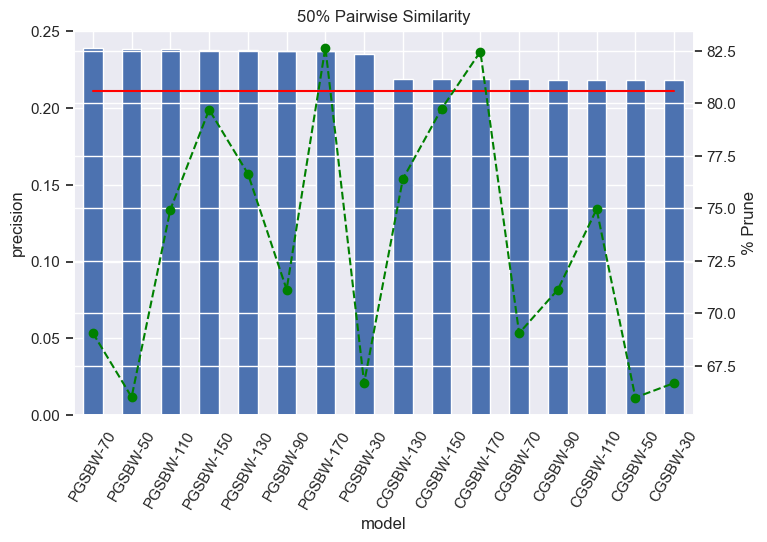

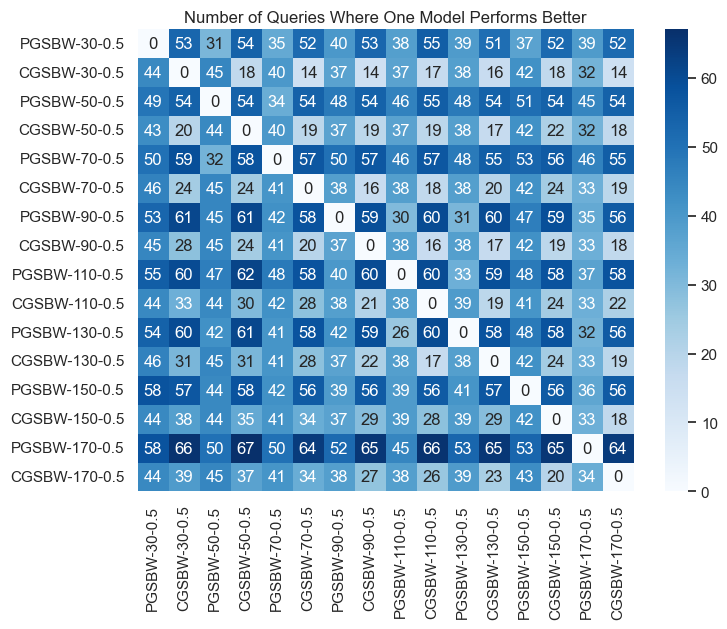

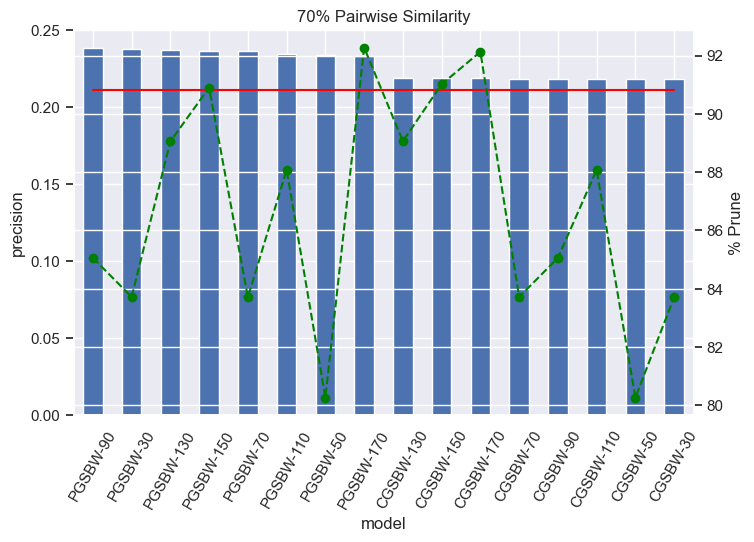

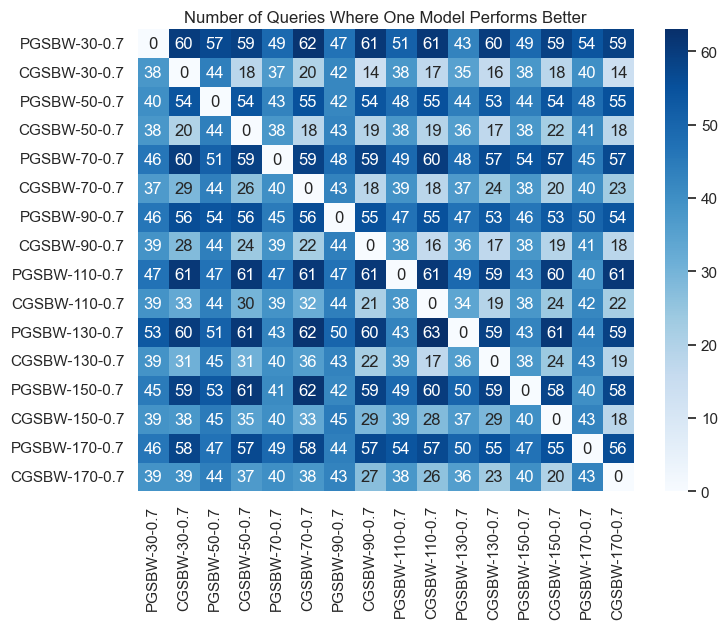

In [17]:
sims = [10, 30, 50, 70]
for i in range(len(cls_per_sim_list)):
    plot_experiment(cls_per_sim_list[i], cls_sim_avg_list[i], cls_sim_prune_per_list[i], old_best_model,
                    title=f"{sims[i]}% Pairwise Similarity")
    
    # cm = compare_models(cls_per_sim_list[i].iloc[:, 0::2]) # compare only cgsb's
    cm = compare_models(cls_per_sim_list[i])
    plot_heatmap(cm) 

    # em = evaluate_models(cm, cls_sim_avg_list[i][0::2], cls_sim_prune_per_list[i][0::2], *params)
    em = evaluate_models(cm, cls_sim_avg_list[i], cls_sim_prune_per_list[i], *params)
    evaluated_models.update(em)

In [18]:
for cw_sim_exp in cls_sim_avg_list:
    print(max(cw_sim_exp))

0.23964
0.23947
0.23889
0.23833


### Performance based on the size of spectral clustering and edge (wout_avg * coeff) between nodes

In [19]:
data = pd.read_excel('exps.xlsx', sheet_name=f"{sheet_name}-avg")

### Prepare data for ploting and analysis to gain insight
cls_avg_experiment = data.iloc[:, :-2]

# split dataframes for each similarity condition letting only cluster size to vary
selected_columns = [
    [
        column
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for column in cls_avg_experiment.columns[i:i+2].values  # Get the subset of columns
    ]
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_per_avg_list = [cls_avg_experiment[columns] for columns in selected_columns]
cls_per_avg_list[0].head()

cls_avg_avg = data['avg_pre'].dropna().values

cls_avg_avg_list = [
    np.array([
        avg
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for avg in cls_avg_avg[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

cls_avg_prune_per = data['%prune'].dropna().values

cls_avg_prune_per_list = [
    np.array([
        prune_per
        for i in range(j, 64, 8)  # Iterate over i with a step of 8
        for prune_per in cls_avg_prune_per[i:i+2]  # Get the subset of avgs
    ])
    for j in range(0, 8, 2)  # Iterate over j with a step of 2
]

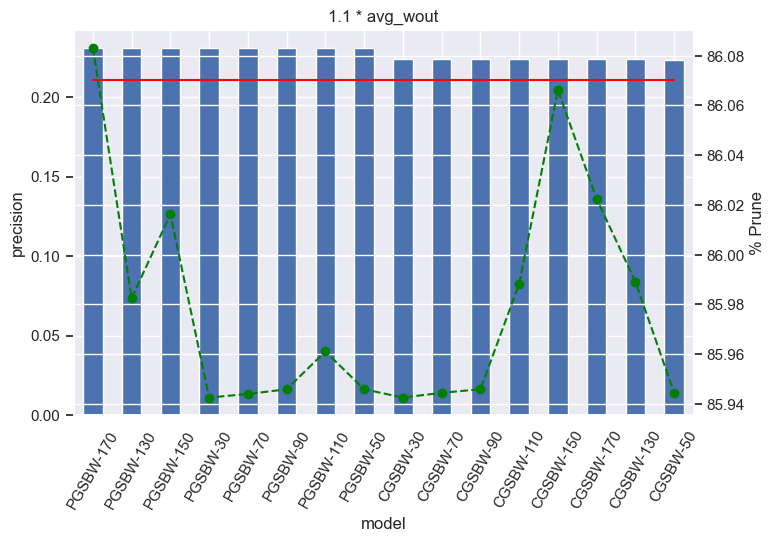

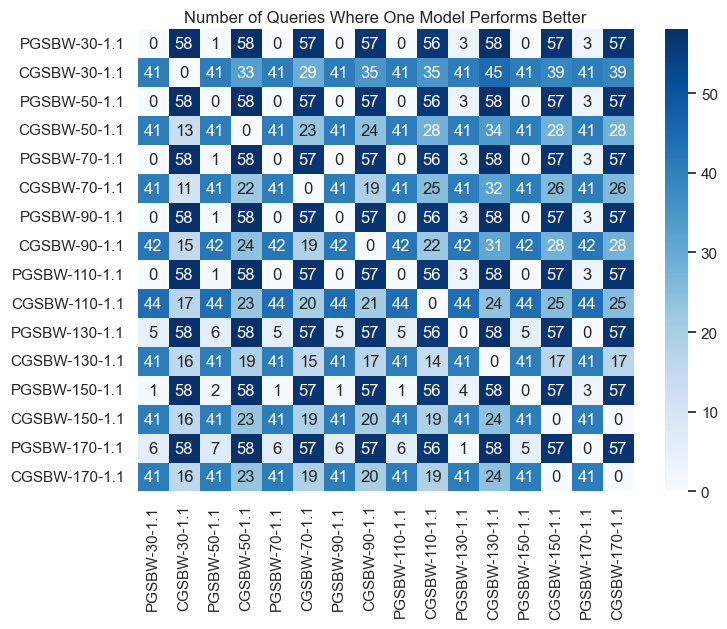

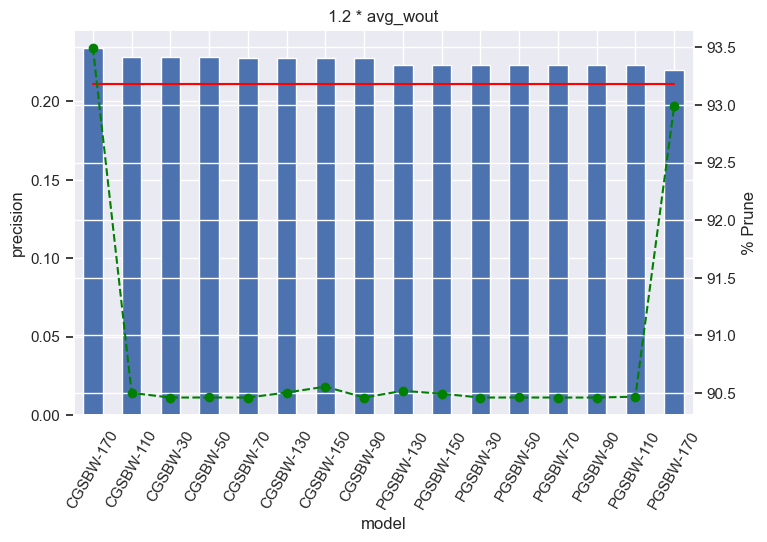

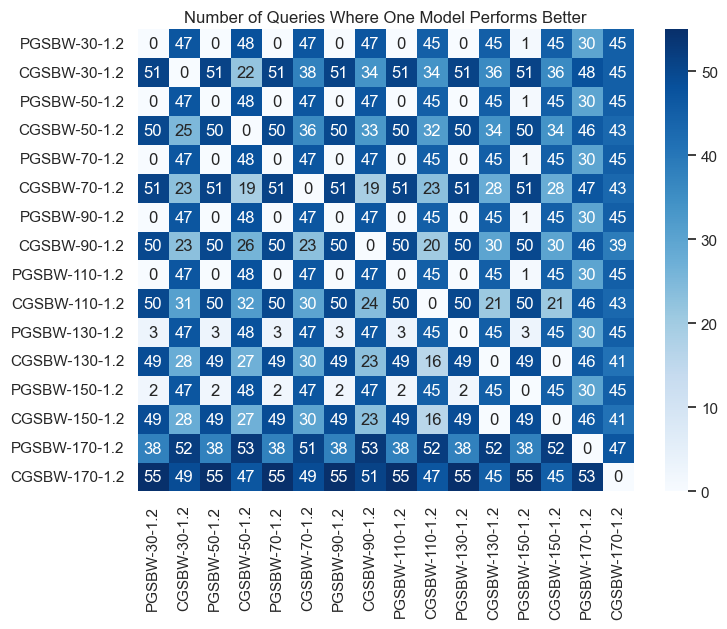

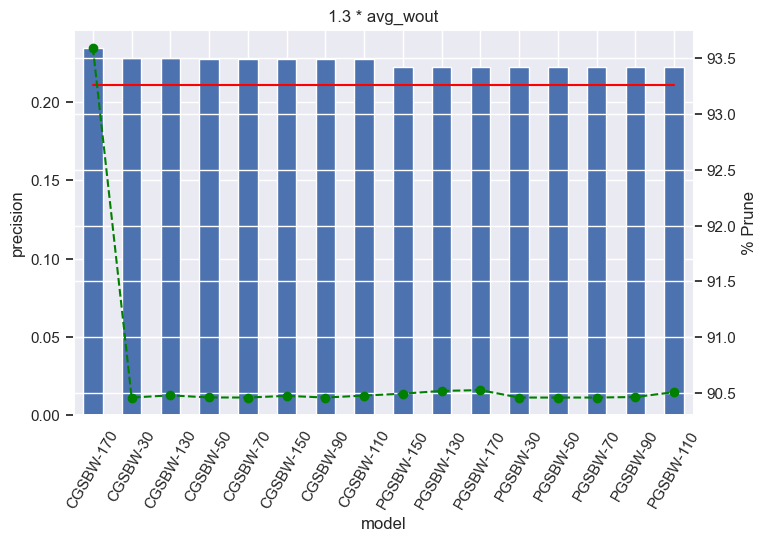

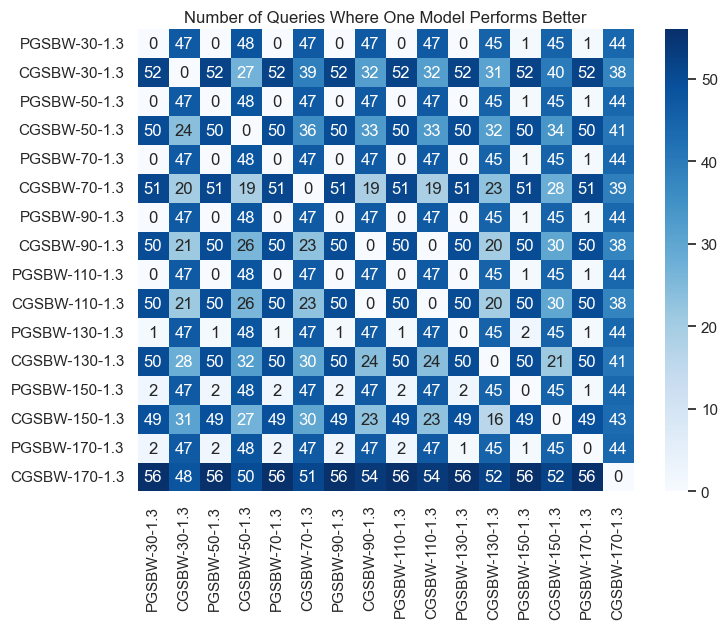

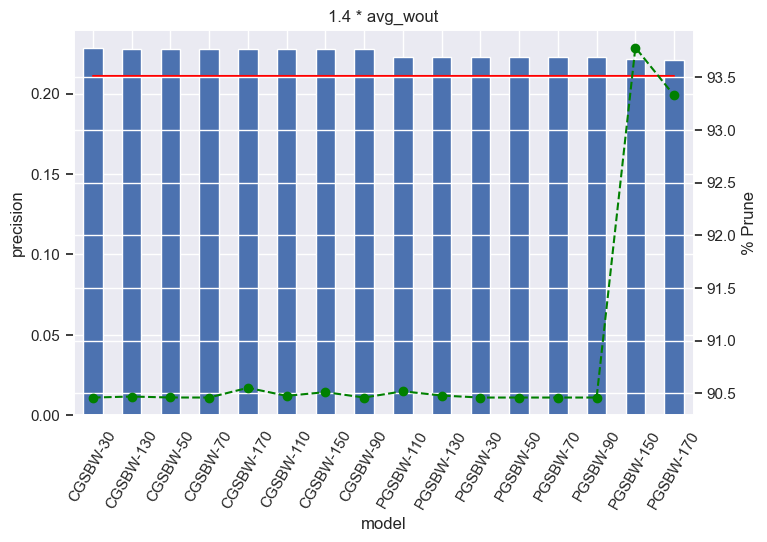

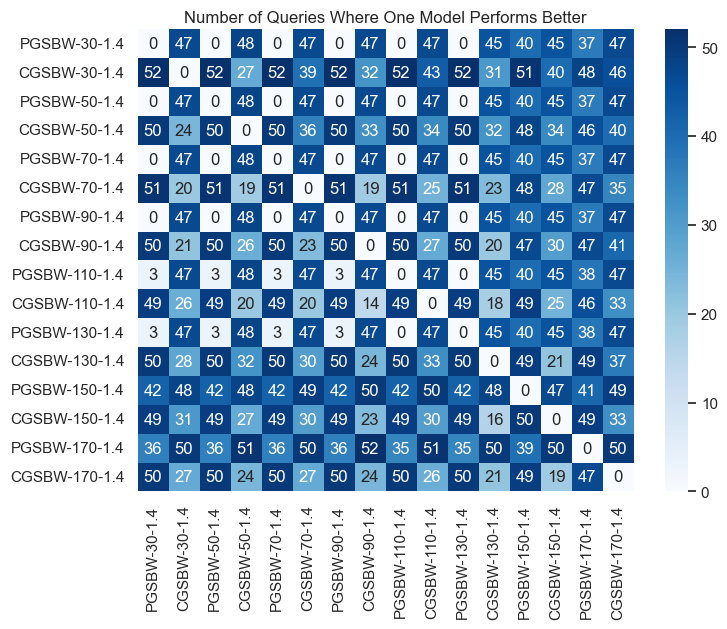

In [20]:
coeffs = [1.1, 1.2, 1.3, 1.4]
mask = 0
for i in range(len(cls_per_sim_list)):
    plot_experiment(cls_per_avg_list[i], cls_avg_avg_list[i], cls_avg_prune_per_list[i], old_best_model,
                    title=f"{coeffs[i]} * avg_wout")
    
    # spaghetti check
    # if i > 0: mask = 1
        
    # cm = compare_models(cls_per_avg_list[i].iloc[:, mask::2]) # compare only pgsbw's
    cm = compare_models(cls_per_avg_list[i])
    plot_heatmap(cm) 

    # em = evaluate_models(cm, cls_avg_avg_list[i][mask::2], cls_avg_prune_per_list[i][mask::2], *params)
    em = evaluate_models(cm, cls_avg_avg_list[i], cls_avg_prune_per_list[i], *params)
    evaluated_models.update(em)

In [21]:
for cw_avg_exp in cls_avg_avg_list:
    print(max(cw_avg_exp))

0.23059
0.23367
0.23449
0.22816


In [22]:
print(evaluated_models)
print(len(evaluated_models))

{'PGSBW-30': 0.2392, 'CGSBW-30': 0.2653, 'PGSBW-50': 0.2395, 'CGSBW-50': 0.2632, 'PGSBW-70': 0.2403, 'CGSBW-70': 0.2758, 'PGSBW-90': 0.2432, 'CGSBW-90': 0.2707, 'PGSBW-110': 0.2461, 'CGSBW-110': 0.2862, 'PGSBW-130': 0.3651, 'CGSBW-130': 0.2901, 'PGSBW-150': 0.3016, 'CGSBW-150': 0.2902, 'PGSBW-170': 0.3899, 'CGSBW-170': 0.2916, 'PGSBW-30-0.1': 0.3372, 'CGSBW-30-0.1': 0.2695, 'PGSBW-50-0.1': 0.337, 'CGSBW-50-0.1': 0.2811, 'PGSBW-70-0.1': 0.3343, 'CGSBW-70-0.1': 0.2877, 'PGSBW-90-0.1': 0.3449, 'CGSBW-90-0.1': 0.2916, 'PGSBW-110-0.1': 0.3422, 'CGSBW-110-0.1': 0.3011, 'PGSBW-130-0.1': 0.343, 'CGSBW-130-0.1': 0.3084, 'PGSBW-150-0.1': 0.3602, 'CGSBW-150-0.1': 0.315, 'PGSBW-170-0.1': 0.3465, 'CGSBW-170-0.1': 0.3183, 'PGSBW-30-0.3': 0.3552, 'CGSBW-30-0.3': 0.2863, 'PGSBW-50-0.3': 0.3881, 'CGSBW-50-0.3': 0.2933, 'PGSBW-70-0.3': 0.3647, 'CGSBW-70-0.3': 0.3026, 'PGSBW-90-0.3': 0.3875, 'CGSBW-90-0.3': 0.3055, 'PGSBW-110-0.3': 0.3802, 'CGSBW-110-0.3': 0.3186, 'PGSBW-130-0.3': 0.376, 'CGSBW-130-0.3':

In [23]:
sorted_evaluated_models = sorted(evaluated_models.items(), key=lambda x: x[1], reverse=True)

In [24]:
models_eval = pd.DataFrame(sorted_evaluated_models, columns=['model', 'value'])
models_eval.head()

,model,value
0,PGSBW-170-0.5,0.4718
1,CGSBW-170-1.3,0.4571
2,PGSBW-30-0.7,0.4558
3,PGSBW-130-0.7,0.4546
4,PGSBW-150-0.7,0.4509


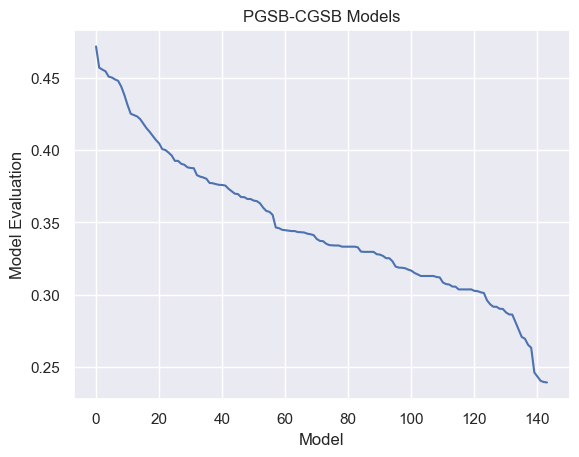

In [25]:
models_eval.plot()
plt.xlabel("Model")
plt.ylabel("Model Evaluation")
plt.legend().remove()
plt.title("PGSB-CGSB Models")
plt.show()

In [26]:
# Define regular expression pattern
pattern = r'-(\d+\.\d+)$'

# Extract the matching pattern from the 'cgsb_model' column
models_eval['group'] = models_eval['model'].str.extract(pattern, expand=False)
models_eval['group'].fillna('cls', inplace=True)
models_eval

,model,value,group
0,PGSBW-170-0.5,0.4718,0.5
1,CGSBW-170-1.3,0.4571,1.3
2,PGSBW-30-0.7,0.4558,0.7
3,PGSBW-130-0.7,0.4546,0.7
4,PGSBW-150-0.7,0.4509,0.7
...,...,...,...
139,PGSBW-110,0.2461,cls
140,PGSBW-90,0.2432,cls
141,PGSBW-70,0.2403,cls
142,PGSBW-50,0.2395,cls


In [27]:
top_n = 3
# Group the DataFrame by the extracted 'group' column
grouped_df = models_eval.groupby(by='group')

best_n_per_exp = {}
# Iterate over the groups and print the group name along with the corresponding data
for group, data in grouped_df:
    # pick each row and convert to dictionary
    for index, row in data.iloc[:top_n, :2].iterrows():
        best_n_per_exp.update({row["model"]: row["value"]})
    
print(best_n_per_exp)
print(len(best_n_per_exp))

{'PGSBW-150-0.1': 0.3602, 'PGSBW-170-0.1': 0.3465, 'PGSBW-90-0.1': 0.3449, 'PGSBW-170-0.3': 0.4152, 'PGSBW-150-0.3': 0.3963, 'PGSBW-50-0.3': 0.3881, 'PGSBW-170-0.5': 0.4718, 'PGSBW-110-0.5': 0.4312, 'PGSBW-150-0.5': 0.4252, 'PGSBW-30-0.7': 0.4558, 'PGSBW-130-0.7': 0.4546, 'PGSBW-150-0.7': 0.4509, 'CGSBW-30-1.1': 0.3699, 'CGSBW-110-1.1': 0.3446, 'CGSBW-50-1.1': 0.344, 'CGSBW-170-1.2': 0.444, 'PGSBW-170-1.2': 0.407, 'CGSBW-30-1.2': 0.3983, 'CGSBW-170-1.3': 0.4571, 'CGSBW-30-1.3': 0.4001, 'CGSBW-50-1.3': 0.3926, 'PGSBW-150-1.4': 0.4098, 'CGSBW-30-1.4': 0.4047, 'PGSBW-170-1.4': 0.4007, 'PGSBW-170': 0.3899, 'PGSBW-130': 0.3651, 'PGSBW-150': 0.3016}
27


In [28]:
best_nm_per_exp = pd.DataFrame(best_n_per_exp.items(), columns=["model", "value"])
best_nm_per_exp = best_nm_per_exp.sort_values(by='value', ascending=False).reset_index(drop=True)
best_nm_per_exp

,model,value
0,PGSBW-170-0.5,0.4718
1,CGSBW-170-1.3,0.4571
2,PGSBW-30-0.7,0.4558
3,PGSBW-130-0.7,0.4546
4,PGSBW-150-0.7,0.4509
5,CGSBW-170-1.2,0.4440
6,PGSBW-110-0.5,0.4312
7,PGSBW-150-0.5,0.4252
8,PGSBW-170-0.3,0.4152
9,PGSBW-150-1.4,0.4098


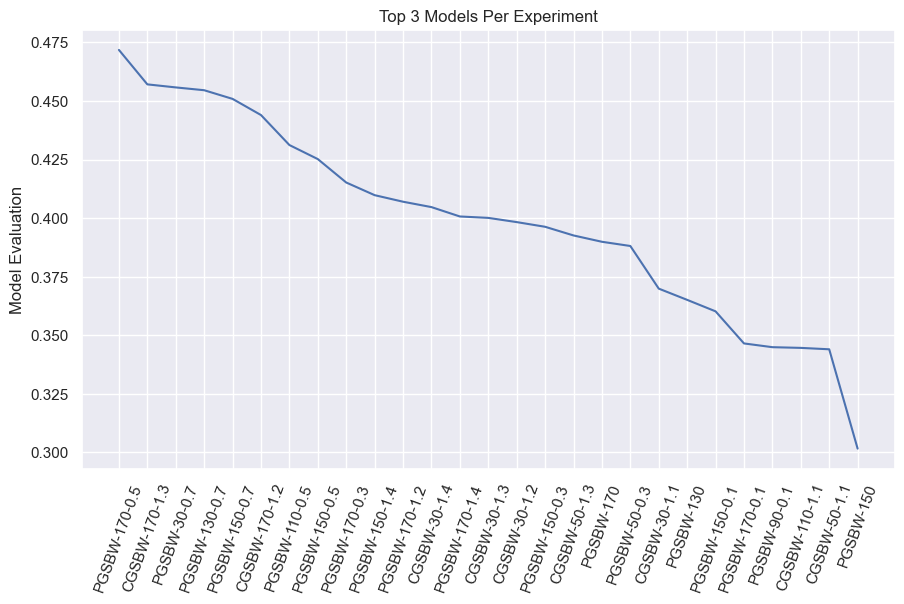

In [29]:
# Plot the DataFrame with all labels displayed
fig, ax = plt.subplots(figsize=(9, 6))

# Set the tick positions and labels
ax.set_xticks(range(len(best_nm_per_exp['model'])))
ax.set_xticklabels(best_nm_per_exp['model'], rotation=70)

# Plot the data
ax.plot(best_nm_per_exp['value'])

plt.tight_layout()
plt.ylabel("Model Evaluation")
plt.title(f"Top {top_n} Models Per Experiment")
plt.show()

In [30]:
# uparxei ksekathara grammiikh sxesh metaksu toy similarity kai % prune (sim->up, %prune->up)
#### sto constant window
# oso megalwnei to similarity, ara kai to pososto tou prune 
# toso kalutereuei to pgsw
# mexri ena shmeio, kathws to prune arxizei kai ginetai apokleistika apo to sim() >= (logw ths katanomhs twn clusters)
# kai h omoiothta auth dden einai antiproseupeutikh kathws ta embeddings den einai "kala"

# enw to cgsbw...anekfrastw
# afou ta embeddings/concepts axrhsta => cnwk => axrhsto na sunisferei
# afou %prune -> 0

# gia na doume sth periptwsh tou varying clusters...
# isws ekei piasei kati

In [31]:
best_so_far = pd.read_excel('topn_models.xlsx')
best_so_far.head()

,CGSB-110-0.5,CGSB-170-1.3,CGSB-150-0.5,CGSB-130-1.3,CGSB-170-1.4,CGSB-130-0.5,CGSB-130-1.4,PGSB-70-0.7,CGSB-150-0.7,CGSB-150-1.4,...,CGSB-50-1.2,CGSB-150-0.1,CGSB-110-0.1,CGSB-170-0.3,CGSB-30-0.3,CGSB-110,CGSB-170,CGSB-30,avg,%prune
0,0.299,0.299,0.299,0.299,0.300,0.299,0.299,0.323,0.299,0.299,...,0.294,0.299,0.299,0.299,0.299,0.299,0.299,0.294,0.24460,95.312151
1,0.069,0.069,0.069,0.069,0.069,0.069,0.071,0.189,0.069,0.069,...,0.068,0.069,0.069,0.059,0.059,0.069,0.069,0.076,0.24437,92.133429
2,0.177,0.177,0.178,0.177,0.180,0.177,0.171,0.180,0.177,0.177,...,0.176,0.178,0.177,0.177,0.174,0.177,0.177,0.175,0.24379,96.078864
3,0.128,0.130,0.129,0.128,0.129,0.130,0.134,0.211,0.130,0.129,...,0.128,0.129,0.128,0.129,0.130,0.129,0.129,0.128,0.24402,92.142894
4,0.310,0.309,0.313,0.310,0.315,0.309,0.316,0.286,0.309,0.314,...,0.309,0.313,0.310,0.314,0.313,0.314,0.314,0.311,0.24365,92.827565


In [32]:
avgs, prunes = best_so_far[['avg', '%prune']].T.values

In [33]:
best_so_far = best_so_far.drop(columns=['avg', '%prune'])
best_so_far.head()

,CGSB-110-0.5,CGSB-170-1.3,CGSB-150-0.5,CGSB-130-1.3,CGSB-170-1.4,CGSB-130-0.5,CGSB-130-1.4,PGSB-70-0.7,CGSB-150-0.7,CGSB-150-1.4,...,CGSB-110-1.1,CGSB-170-0.1,CGSB-50-1.2,CGSB-150-0.1,CGSB-110-0.1,CGSB-170-0.3,CGSB-30-0.3,CGSB-110,CGSB-170,CGSB-30
0,0.299,0.299,0.299,0.299,0.300,0.299,0.299,0.323,0.299,0.299,...,0.299,0.284,0.294,0.299,0.299,0.299,0.299,0.299,0.299,0.294
1,0.069,0.069,0.069,0.069,0.069,0.069,0.071,0.189,0.069,0.069,...,0.069,0.071,0.068,0.069,0.069,0.059,0.059,0.069,0.069,0.076
2,0.177,0.177,0.178,0.177,0.180,0.177,0.171,0.180,0.177,0.177,...,0.177,0.181,0.176,0.178,0.177,0.177,0.174,0.177,0.177,0.175
3,0.128,0.130,0.129,0.128,0.129,0.130,0.134,0.211,0.130,0.129,...,0.129,0.129,0.128,0.129,0.128,0.129,0.130,0.129,0.129,0.128
4,0.310,0.309,0.313,0.310,0.315,0.309,0.316,0.286,0.309,0.314,...,0.314,0.311,0.309,0.313,0.310,0.314,0.313,0.314,0.314,0.311


In [34]:
best_to_compare = pd.DataFrame()
best_avgs = []
best_prunes = []

In [35]:
all_sheets = pd.read_excel('exps.xlsx', sheet_name=None)

In [36]:
for bm in best_nm_per_exp['model']:
    for sheet_name, sheet in all_sheets.items():
        try:
            wanted = sheet[bm]
            idx = list(sheet.columns).index(bm)
            avg, prune = sheet['avg_pre'].iloc[idx], sheet['%prune'].iloc[idx]
            best_avgs.append(avg)
            best_prunes.append(prune)
            best_to_compare[bm] = wanted.values
        except KeyError:
            continue

In [37]:
best_to_compare2 = pd.concat([best_to_compare, best_so_far], axis=1)

In [38]:
best_to_compare2

,PGSBW-170-0.5,CGSBW-170-1.3,PGSBW-30-0.7,PGSBW-130-0.7,PGSBW-150-0.7,CGSBW-170-1.2,PGSBW-110-0.5,PGSBW-150-0.5,PGSBW-170-0.3,PGSBW-150-1.4,...,CGSB-110-1.1,CGSB-170-0.1,CGSB-50-1.2,CGSB-150-0.1,CGSB-110-0.1,CGSB-170-0.3,CGSB-30-0.3,CGSB-110,CGSB-170,CGSB-30
0,0.343,0.284,0.344,0.393,0.378,0.283,0.377,0.330,0.319,0.337,...,0.299,0.284,0.294,0.299,0.299,0.299,0.299,0.299,0.299,0.294
1,0.071,0.032,0.096,0.070,0.078,0.032,0.084,0.076,0.113,0.038,...,0.069,0.071,0.068,0.069,0.069,0.059,0.059,0.069,0.069,0.076
2,0.184,0.151,0.173,0.182,0.182,0.151,0.188,0.187,0.178,0.185,...,0.177,0.181,0.176,0.178,0.177,0.177,0.174,0.177,0.177,0.175
3,0.114,0.120,0.137,0.136,0.252,0.118,0.116,0.118,0.119,0.109,...,0.129,0.129,0.128,0.129,0.128,0.129,0.130,0.129,0.129,0.128
4,0.283,0.294,0.299,0.299,0.306,0.293,0.284,0.283,0.298,0.298,...,0.314,0.311,0.309,0.313,0.310,0.314,0.313,0.314,0.314,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.287,0.273,0.270,0.287,0.282,0.247,0.286,0.282,0.297,0.044,...,0.275,0.273,0.273,0.275,0.275,0.275,0.274,0.275,0.275,0.273
96,0.340,0.380,0.243,0.391,0.388,0.380,0.343,0.340,0.293,0.310,...,0.359,0.359,0.364,0.352,0.359,0.359,0.358,0.359,0.359,0.361
97,0.136,0.115,0.132,0.135,0.142,0.116,0.136,0.136,0.129,0.163,...,0.127,0.125,0.125,0.126,0.124,0.127,0.125,0.127,0.127,0.124
98,0.602,0.603,0.603,0.602,0.602,0.603,0.602,0.602,0.602,0.602,...,0.602,0.602,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602


In [39]:
new_avgs = list(avgs[:27]) + best_avgs
new_prunes = list(prunes[:27]) + best_prunes

In [40]:
for _ in range(100-2*27):
    new_avgs.append(pd.NA)
    new_prunes.append(pd.NA)

In [41]:
best_to_compare2['avg'] = new_avgs
best_to_compare2['%prune'] = new_prunes

In [42]:
best_to_compare2

,PGSBW-170-0.5,CGSBW-170-1.3,PGSBW-30-0.7,PGSBW-130-0.7,PGSBW-150-0.7,CGSBW-170-1.2,PGSBW-110-0.5,PGSBW-150-0.5,PGSBW-170-0.3,PGSBW-150-1.4,...,CGSB-50-1.2,CGSB-150-0.1,CGSB-110-0.1,CGSB-170-0.3,CGSB-30-0.3,CGSB-110,CGSB-170,CGSB-30,avg,%prune
0,0.343,0.284,0.344,0.393,0.378,0.283,0.377,0.330,0.319,0.337,...,0.294,0.299,0.299,0.299,0.299,0.299,0.299,0.294,0.2446,95.312151
1,0.071,0.032,0.096,0.070,0.078,0.032,0.084,0.076,0.113,0.038,...,0.068,0.069,0.069,0.059,0.059,0.069,0.069,0.076,0.24437,92.133429
2,0.184,0.151,0.173,0.182,0.182,0.151,0.188,0.187,0.178,0.185,...,0.176,0.178,0.177,0.177,0.174,0.177,0.177,0.175,0.24379,96.078864
3,0.114,0.120,0.137,0.136,0.252,0.118,0.116,0.118,0.119,0.109,...,0.128,0.129,0.128,0.129,0.130,0.129,0.129,0.128,0.24402,92.142894
4,0.283,0.294,0.299,0.299,0.306,0.293,0.284,0.283,0.298,0.298,...,0.309,0.313,0.310,0.314,0.313,0.314,0.314,0.311,0.24365,92.827565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.287,0.273,0.270,0.287,0.282,0.247,0.286,0.282,0.297,0.044,...,0.273,0.275,0.275,0.275,0.274,0.275,0.275,0.273,NaN,NaN
96,0.340,0.380,0.243,0.391,0.388,0.380,0.343,0.340,0.293,0.310,...,0.364,0.352,0.359,0.359,0.358,0.359,0.359,0.361,NaN,NaN
97,0.136,0.115,0.132,0.135,0.142,0.116,0.136,0.136,0.129,0.163,...,0.125,0.126,0.124,0.127,0.125,0.127,0.127,0.124,NaN,NaN
98,0.602,0.603,0.603,0.602,0.602,0.603,0.602,0.602,0.602,0.602,...,0.602,0.602,0.602,0.602,0.603,0.602,0.602,0.602,NaN,NaN


In [43]:
best_to_compare2.to_excel('topn_models.xlsx', index=False)